## Create Histogram with Length of tokenized Recipes
####  3. November 2020
### Input
Chefkoch Instructions data csv-file
### Output
Length representation in a Histogram 

In [128]:
# Coco Path
# path = r"C:\Users\CocoL\Universität St.Gallen\STUD-Capstoneproject Tell 6 - General\02-Coding"
# Jona Path
# path = r"/Users/jhoff/Universität St.Gallen/STUD-Capstoneproject Tell 6 - Dokumente/General/02-Coding"
# Giovanni Path
# path = r"/Users/jonathanebner/Universität St.Gallen/STUD-Capstoneproject Tell 6 - General/02-Coding"
# Leo Path
path = r"/Users/Leonidas/Universität St.Gallen/STUD-Capstoneproject Tell 6 - General/02-Coding"

# Import packages
import pandas as pd
# import numpy as np
import spacy
import matplotlib.pyplot as plt
import numpy as np

# Initiate nlp model
disabled = ['parser', 'tagger', 'ner']
nlp = spacy.load('de_core_news_lg', disable=disabled)

In [129]:
# Load data and seperate instructions at @ as defined
data = pd.read_csv(path+"/01-Data/instructions.csv", sep="@", encoding="utf-16", header=None, error_bad_lines=False)
print("Number of imported recipes: ",len(data))

Number of imported recipes:  12190


In [130]:
# Name Instructions column
data.columns=["Instructions"]
# Create a column with tokenized instructions using spacy
data["Tokenized"] = data["Instructions"].apply(nlp) 
# Create a column with the amount of tokens per recipe
data["Length"] = data["Tokenized"].apply(len)
# data.head()

In [131]:
# Print some metrics about the length of the recipes
print("---------- METRICS ----------")
print("")
print("Minimum Length of a Recipe: ", min(data.Length))
print("Maximum Length of a Recipe: ", max(data.Length))
print("Mean Length of a Recipe: ", round(np.mean(data.Length)))
print("Standard Deviation of the Length of all Recipes: ", round(np.std(data.Length)))
print("Number of Recipes longer than 512 Tokens: ", len(data.Length[data["Length"]>512]))
print("")
print("-----------------------------")

---------- METRICS ----------

Minimum Length of a Recipe:  10
Maximum Length of a Recipe:  865
Mean Length of a Recipe:  142
Standard Deviation of the Length of all Recipes:  70
Number of Recipes longer than 512 Tokens:  36

-----------------------------


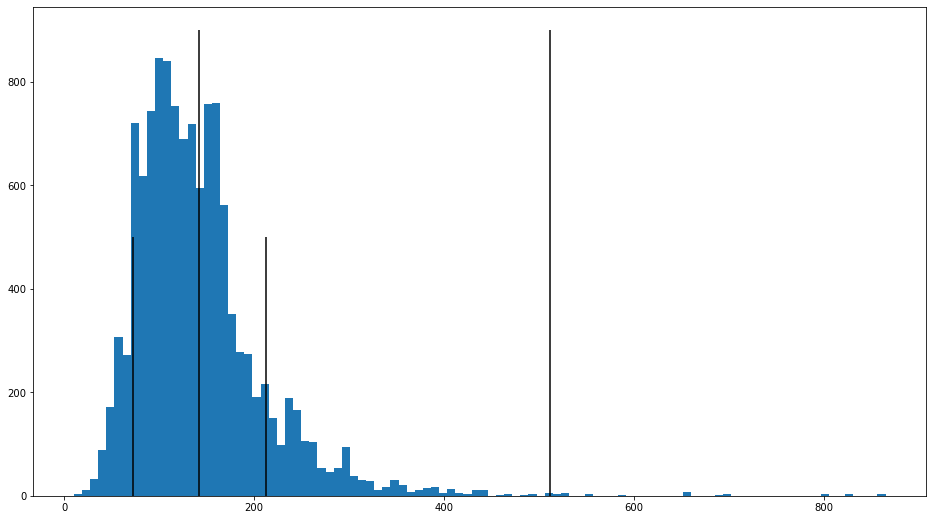

In [155]:
# Init plot and increase figure size
plt.figure(figsize=(16, 9))
# Add histogram of recipe length in no. of tokens to the plot
plt.hist(data.Length, bins = 100)

# Mark important metrics with vertical lines
plt.vlines(512, label="Max size BERT", ymin= 0, ymax= 900)
plt.vlines(np.mean(data.Length), label="Mean Length", ymin= 0, ymax= 900)
plt.vlines(np.mean(data.Length)-np.std(data.Length), label="Mean Length", ymin= 0, ymax= 500)
plt.vlines(np.mean(data.Length)+np.std(data.Length), label="Mean Length", ymin= 0, ymax= 500)

# Save figure to 02-Coding --> 02-Plots --> chefkoch_recipe_length_hist.png before showing
plt.savefig(path+"/02-Plots/chefkoch_recipe_length_hist.png")

In [1]:
# Show path of language model
# import spacy
# model = spacy.load("de_core_news_lg")
# model._path

PosixPath('/Users/Leonidas/anaconda3/envs/nlp-env/lib/python3.8/site-packages/de_core_news_lg/de_core_news_lg-2.3.0')